# Photometry data analysis
requires iblphotometry to be installed with optional analysis dependencies

`pip install iblphotometry[analysis]`

currently, this only works from the `develop` branch, so the install procedure looks like this. Your `ibllib` branch also needs to be on `photometry-integration`

```
git clone git@github.com:int-brain-lab/ibl-photometry.git
cd ibl-photometry
git checkout develop
pip install -e .[develop]
```


In [ ]:
from iblphotometry import plotters
from one.api import ONE

# ONE instantiation
one = ONE()
eid = 'a1ccc8ed-9829-4af8-91fd-cc1c83b74b98'

## plotting photometry traces
`iblphotometry` offers plotting functions to visualize photometry traces and PSTHs directly from the `eid`

/home/georg/code/ibl-photometry/src/iblphotometry/plotters.py:74: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes.legend()


array([<Axes: xlabel='time (min)', ylabel='GCaMP\nfluorescence (au)'>,
       <Axes: xlabel='time (min)', ylabel='Isosbestic\nfluorescence (au)'>],
      dtype=object)

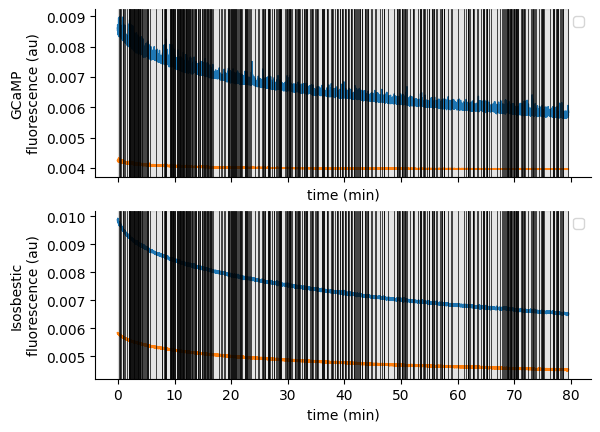

In [2]:
# plot directly from eid using
plotters.plot_photometry_traces_from_eid(eid=eid, one=one)  # this uses the PhotometrySessionLoader under the hood


## plotting PSTHs

with the `plot_psths_from_eid()` function it is possible to plot PSTHs directly for a given session specified by an eid. This uses the `PhotometrySessionLoader` under the hood.

### PSTH definition and argumnents
PSTHs are defined by the `align_on` argument, which has to be a column name of the trials table containing the timestamps that will be reference of the PSTH. Optionally, multiple PSTHs are generated if a `split_by` argument is passed. If so, the argument is used to split the trials table along the column referred to by the argument into groups and PSTHs are calculated seperately.

By defalt, a sliding mad pipeline is applied to the data, any pipeline can be specified by the `pipeline` argument. The `channel` argument defines the signal band to use.

/home/georg/.python_envs/ibl/lib/python3.13/site-packages/pynapple/core/utils.py:196: UserWarning: Converting 't' to numpy.array. The provided array was of type 'Index'.
  warnings.warn(


array([<Axes: ylabel='feedbackType=-1.0'>,
       <Axes: xlabel='time (s)', ylabel='feedbackType=1.0'>], dtype=object)

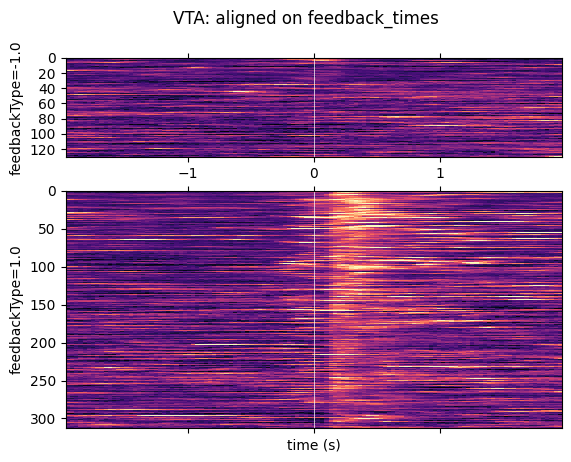

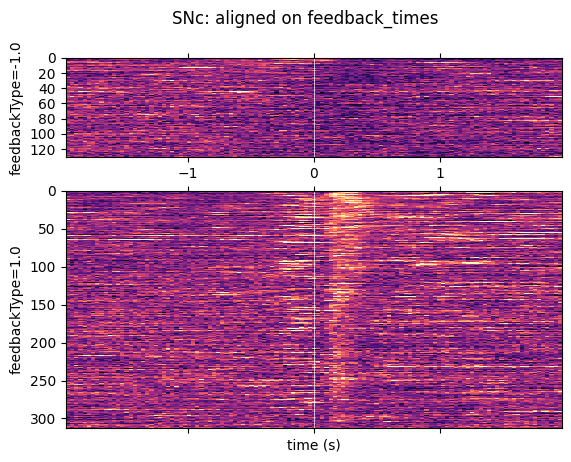

In [8]:
plotters.plot_psths_from_eid(
    eid=eid,
    one=one,
    align_on='feedback_times',
    split_by='feedbackType',
    channel='GCaMP',
)


## Custom analysis
some examples for more detailed and more custom analysis

/home/georg/code/ibl-photometry/src/iblphotometry/plotters.py:74: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes.legend()


array([<Axes: xlabel='time (min)', ylabel='GCaMP\nfluorescence (au)'>,
       <Axes: xlabel='time (min)', ylabel='Isosbestic\nfluorescence (au)'>],
      dtype=object)

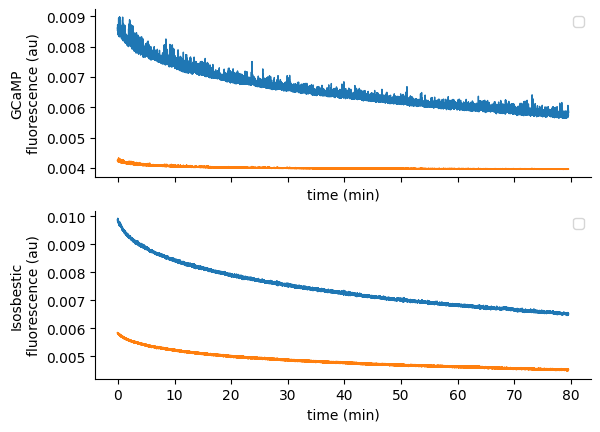

In [12]:
from brainbox.io.one import PhotometrySessionLoader
from iblphotometry.pipelines import isosbestic_correction_pipeline

# loading data as before
psl = PhotometrySessionLoader(eid=eid, one=one)
psl.load_photometry()

# plot the raw photometry signal
from iblphotometry.plotters import plot_photometry_bands, plot_photometry_trace
plot_photometry_bands(psl.photometry)

<Axes: xlabel='time (min)', ylabel='fluorescence (au)'>

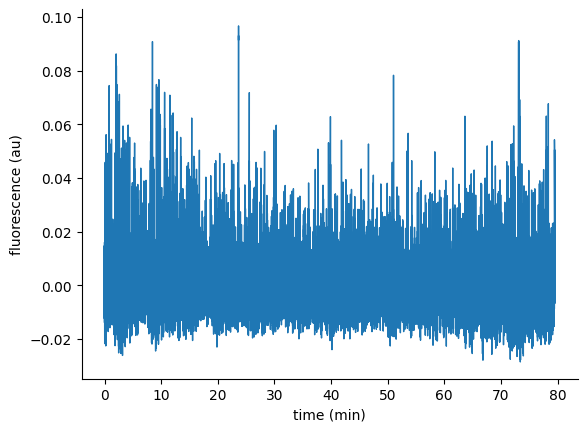

In [13]:
from iblphotometry import pipelines

# do the isosbestic correction and plot
signal = psl.photometry['GCaMP']['VTA']
reference = psl.photometry['Isosbestic']['VTA']
signal_processed = pipelines.run_pipeline(isosbestic_correction_pipeline, signal, reference)

# plot the processed photometry signal
plot_photometry_trace(signal_processed)

In [14]:
# plot the psth split by contrast

# adding contrast
trials = psl.trials
trials["contrast"] = -1 * trials["contrastLeft"]
ix = trials["contrastLeft"].isna()
trials.loc[ix, "contrast"] = trials.loc[ix, "contrastRight"]
trials



,stimOnTrigger_times,quiescencePeriod,goCueTrigger_times,included,stimOffTrigger_times,stimOff_times,goCue_times,response_times,choice,stimOn_times,contrastLeft,contrastRight,feedback_times,feedbackType,rewardVolume,probabilityLeft,firstMovement_times,intervals_0,intervals_1,contrast
0,5.631800,0.691136,5.731900,True,7.591700,7.650700,5.749400,6.591600,-1.0,5.834200,NaN,1.0000,6.591700,1.0,1.5,0.5,6.447995,0.000000,8.150701,1.0000
1,16.067000,0.560657,16.111300,True,17.527500,17.583500,16.143700,16.527400,1.0,16.111200,0.000,NaN,16.527500,1.0,1.5,0.5,16.199995,8.847700,18.083502,-0.0000
2,19.198900,0.476476,19.244400,True,26.461800,26.510900,19.273100,25.461700,1.0,19.244300,0.125,NaN,25.461800,1.0,1.5,0.5,25.285995,18.722300,27.010902,-0.1250
3,28.113600,0.457060,28.166800,True,37.354700,37.427300,28.195200,36.354600,-1.0,28.166700,NaN,0.0000,36.354700,1.0,1.5,0.5,31.650995,27.656400,37.927302,0.0000
4,39.739100,0.606345,39.816600,True,50.098900,50.165700,39.845600,49.098800,-1.0,39.816500,NaN,1.0000,49.098900,1.0,1.5,0.5,43.309995,38.527700,50.665702,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,4689.949499,0.697823,4690.018699,False,4697.973699,4698.014699,4690.050599,4696.973599,-1.0,4690.018599,NaN,0.0625,4696.973699,1.0,1.5,0.2,4696.778995,4689.251499,4698.514700,0.0625
439,4699.681799,0.539603,4699.735499,False,4707.726699,4707.801599,4699.764799,4706.726599,-1.0,4699.735399,NaN,1.0000,4706.726699,1.0,1.5,0.2,4705.961995,4699.141999,4708.301600,1.0000
440,4709.562099,0.630427,4709.631399,False,4712.951299,4713.014199,4709.660999,4710.951199,1.0,4709.631299,NaN,0.1250,4710.982199,-1.0,0.0,0.2,4710.218995,4708.931499,4713.514201,0.1250
441,4714.569099,0.436503,4714.634699,False,4719.516799,4719.584599,4714.663599,4717.516699,1.0,4714.634599,NaN,0.1250,4717.548999,-1.0,0.0,0.2,4716.861995,4714.132399,4720.084600,0.1250


In [18]:
import pynapple as nap
from iblphotometry.analysis import psth_nap
from iblphotometry.plotters import plot_psths

signal_processed = nap.Tsd(t=signal_processed.index, d=signal_processed.values)
signal_processed


Time (s)
--------------  ------------
-4.984346638     0.00234695
-4.951003262     0.00111976
-4.917659887    -0.000194351
-4.88434851      0.00181639
-4.851005135    -0.000325523
-4.817693758    -0.00142729
-4.784350383    -0.00115826
...
4773.108464653   0.0213542
4773.141808029   0.0203753
4773.175119405   0.0181272
4773.208462781   0.0200465
4773.241806157   0.0129848
4773.275117533   0.00963362
4773.308460909   0.0128609
dtype: float64, shape: (143357,)

/home/georg/.python_envs/ibl/lib/python3.13/site-packages/pynapple/core/time_index.py:109: UserWarning: timestamps are not sorted
  warn("timestamps are not sorted", UserWarning)


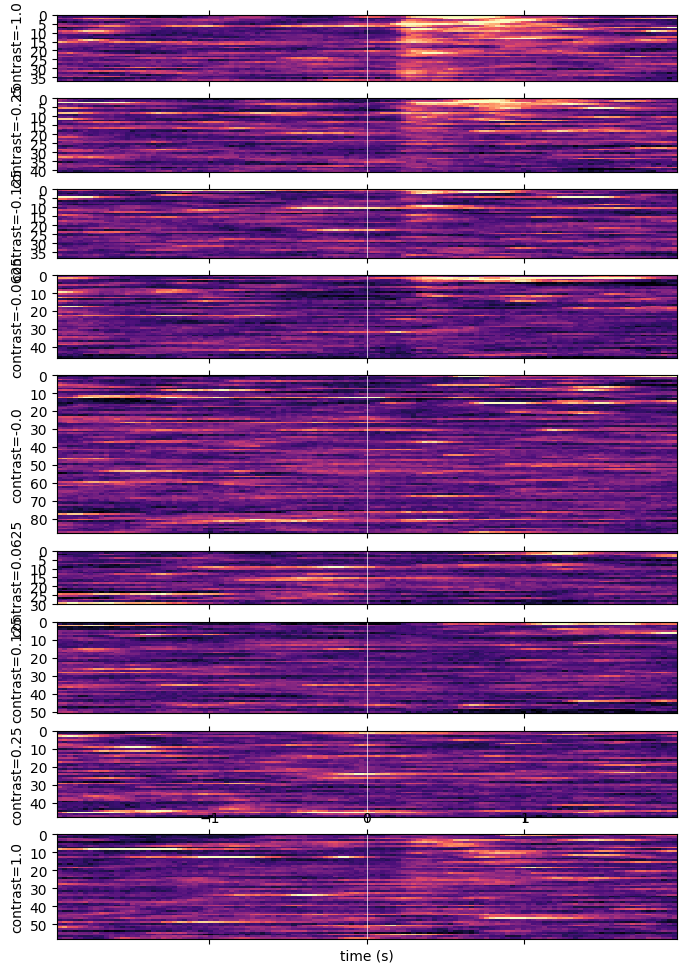

In [19]:


psths = psth_nap(signal_processed, trials, align_on='stimOn_times', split_by='contrast')
axes = plot_psths(psths, split_by='contrast')
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches([8,12])

In [25]:
psths[-0.25]

Time (s)      0         1         2         3         4         ...
------------  --------  --------  --------  --------  --------  -----
-1.967259184  0.01275   0.00778   0.05922   -0.00231  0.00801   ...
-1.933915808  0.00936   0.0029    0.06755   0.00083   0.00629   ...
-1.900572432  0.00108   0.00036   0.07019   -0.00169  0.00029   ...
-1.867229056  -0.00384  -0.00209  0.06964   0.00559   0.00107   ...
-1.83388568   0.0003    -0.00731  0.07147   0.00262   -0.00788  ...
-1.800542304  -0.00339  -0.01025  0.07194   0.00669   -0.00524  ...
-1.767198928  -0.00727  -0.00989  0.067     0.00758   -0.00571  ...
...           ...       ...       ...       ...       ...       ...
1.767198928   -0.00455  0.02847   -0.00567  0.00249   0.00176   ...
1.800542304   -1e-05    0.02035   -0.00446  0.002     -2e-05    ...
1.83388568    -0.00569  0.01342   -0.01107  0.00532   -0.00418  ...
1.867229056   -0.00676  0.0063    -0.00445  0.00276   -0.00146  ...
1.900572432   -0.00524  0.00521   -0.00827  0.

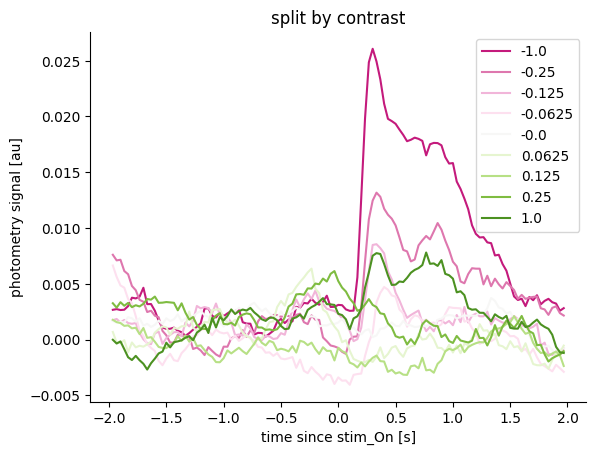

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# averages
fig, axes = plt.subplots()

contrasts = sorted(list(psths.keys()))
contrast_colors = dict(zip(contrasts, sns.color_palette('PiYG', n_colors=len(contrasts))))

for contrast in contrasts:
    x = psths[contrast].t
    y = psths[contrast].average(axis=1) # trial averaging
    axes.plot(x, y , label=contrast, color=contrast_colors[contrast])

axes.set_title('split by contrast')
axes.legend()
axes.set_xlabel('time since stim_On [s]')
axes.set_ylabel('photometry signal [au]')
sns.despine(fig)